In [21]:
import xgboost as xgb
import pandas as pd
import numpy as np
import os

# Training script for New York City taxi trip data
#
# Author: Tianyu Li
# Created on Feb 13th, 2019

# Load csv files into Pandas
rawdata = pd.read_csv("train.csv")

# Data cleaning helper function for NYC taxi data
#
# Inputs:
# data:pandas data frame to be cleaned)
def clean_data(data):
    # Load csv file into Pandas
    data = pd.read_csv("train.csv")
    
    # Data cleaning
    # Convert id to integer
    data.id = data.id.apply(lambda x: int(str(x)[2:]))
    
    # Convert pickup/dropoff time to unix timestamp
    data.pickup_datetime = data.pickup_datetime.apply(pd.Timestamp)
    data.pickup_datetime = data.pickup_datetime.astype(np.int64) // 10 ** 9
    
    data.dropoff_datetime = data.dropoff_datetime.apply(pd.Timestamp)
    data.dropoff_datetime = data.dropoff_datetime.astype(np.int64) // 10 ** 9
    
    # Convert the flag to 0 and 1 where 0 = Yes and 1 = No
    data.store_and_fwd_flag = data.store_and_fwd_flag.map(dict(Y = 1, N = 0))
    
    return data

# Clean data
cleaned_data = clean_data(rawdata)

# Load cleaned data to xgboost regressor
traindata = xgb.DMatrix(data = cleaned_data.iloc[:100000, :-1], label = cleaned_data.iloc[:100000, -1])
testdata = xgb.DMatrix(data = cleaned_data.iloc[100000:, :-1], label = cleaned_data.iloc[100000:, -1])

# Setting Parameters
param = {'max_depth' : 2, 'eta' : 1, 'silent' : 1, 'objective' : 'reg:linear'}
watchlist = [(testdata, 'test'), (traindata, 'train')]

# Training
num_round = 20
result = dict()

print("Start Training")
bst = xgb.train(param, traindata, num_round, watchlist, evals_result = result)



Start Training
[0]	test-rmse:5353.43	train-rmse:2968.67
[1]	test-rmse:5358.56	train-rmse:2956.14
[2]	test-rmse:5357.19	train-rmse:2952.28
[3]	test-rmse:5365.18	train-rmse:2948.68
[4]	test-rmse:5364.73	train-rmse:2946.77
[5]	test-rmse:5363.31	train-rmse:2936.6
[6]	test-rmse:5368.95	train-rmse:2935.71
[7]	test-rmse:5369.37	train-rmse:2932.02
[8]	test-rmse:5367	train-rmse:2927.86
[9]	test-rmse:5364.36	train-rmse:2922.69
[10]	test-rmse:5364.23	train-rmse:2922.22
[11]	test-rmse:5324.24	train-rmse:2887.01
[12]	test-rmse:5324.27	train-rmse:2884.75
[13]	test-rmse:5327.46	train-rmse:2875.17
[14]	test-rmse:5327.32	train-rmse:2874.43
[15]	test-rmse:5331.26	train-rmse:2874.1
[16]	test-rmse:5331.19	train-rmse:2872.73
[17]	test-rmse:5329.35	train-rmse:2868.85
[18]	test-rmse:5333.8	train-rmse:2866.15
[19]	test-rmse:5333.66	train-rmse:2865.84


In [22]:
result = pd.concat([pd.DataFrame.from_dict(result['train']), pd.DataFrame.from_dict(result['test'])], axis = 1)
result.columns = ['train', 'test']
result

,train,test
0,2968.669678,5353.426758
1,2956.144287,5358.562012
2,2952.283447,5357.189941
3,2948.681396,5365.179199
4,2946.774170,5364.727051
5,2936.602783,5363.310059
6,2935.708008,5368.954590
7,2932.015381,5369.373047
8,2927.864502,5366.995605
9,2922.686279,5364.356445


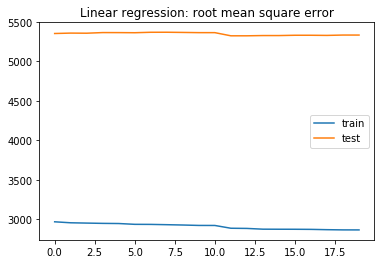

In [23]:
result.plot.line(title = 'Linear regression: root mean square error')